In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Links = pd.read_csv('links.csv')
Ratings = pd.read_csv('ratings.csv')
Movies = pd.read_csv('movies.csv')
Tags = pd.read_csv('tags.csv')

In [3]:
Links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
Links.shape

(9742, 3)

In [5]:
Ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
Ratings.shape

(100836, 4)

In [7]:
Movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
Movies.shape

(9742, 3)

In [9]:
Tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
Tags.shape

(3683, 4)

In [11]:
final_dataset = Ratings.pivot(index = 'movieId',columns = 'userId',values = 'rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
final_dataset.fillna(0,inplace = True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
no_user_voted = Ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = Ratings.groupby('userId')['rating'].agg('count')

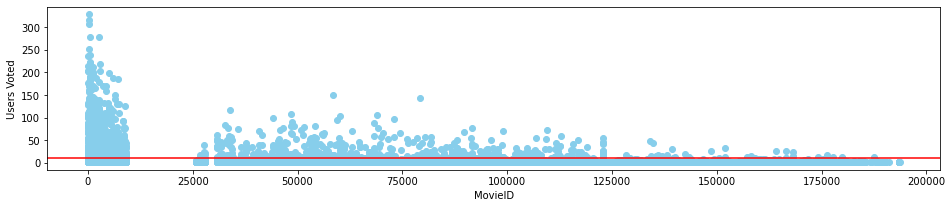

In [14]:
fig,axis = plt.subplots(1,1,figsize = (16,3))
plt.scatter(no_user_voted.index,no_user_voted,color = 'skyblue')
plt.axhline(y = 10, color = 'red')
plt.xlabel('MovieID')
plt.ylabel('Users Voted')
plt.show()

In [15]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

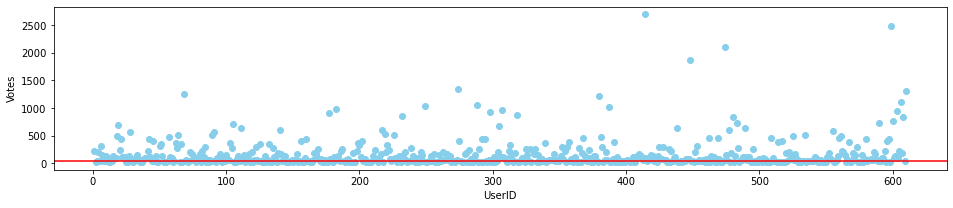

In [16]:
fig,axis = plt.subplots(1,1,figsize = (16,3))
plt.scatter(no_movies_voted.index,no_movies_voted,color = 'skyblue')
plt.axhline(y = 50,color = 'red')
plt.xlabel('UserID')
plt.ylabel('Votes')
plt.show()

In [17]:
final_dataset = final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]

In [18]:
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from scipy.sparse import csr_matrix 

In [20]:
csr_sample = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace = True)

In [21]:
from sklearn.neighbors import NearestNeighbors

In [22]:
Knn = NearestNeighbors(metric = 'cosine',algorithm = 'brute',n_neighbors = 20, n_jobs = -1)
Knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [23]:
def get_movie_recommendation(movie_name):
    n_movie_to_recommend = 10
    movie_list = Movies[Movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances,indices = Knn.kneighbors(csr_sample[movie_idx],n_neighbors = n_movie_to_recommend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key = lambda x:x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = Movies[Movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':Movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index = range(1,n_movie_to_recommend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [30]:
Input = str(input('Enter Movie: '))
get_movie_recommendation(Input)

Enter Movie: Toy Story


,Title,Distance
1,Groundhog Day (1993),0.399495
2,"Lion King, The (1994)",0.398578
3,Pulp Fiction (1994),0.398293
4,Star Wars: Episode VI - Return of the Jedi (1983),0.390663
5,Apollo 13 (1995),0.384633
6,Shrek (2001),0.381472
7,Star Wars: Episode IV - A New Hope (1977),0.380789
8,Toy Story 2 (1999),0.371637
9,Forrest Gump (1994),0.356542
10,Jurassic Park (1993),0.334884
